In [1]:
# ============  Regressor  ============================\n",
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


#============== Metric ===========================================
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# ============= Normalization ===================
from sklearn.preprocessing import MinMaxScaler

# ============= Splitting =======================
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# ======================= KOROSI =============================================
data = pd.read_excel(r'Data_Corrosion_28.xlsx')
data.head()


,Structure,E(HOMO) (Ha),E (LUMO)(Ha),∆E(Ha),Binding Energy (Kcal/mol),Adsorption Energy (Kcal/mol),[Total Energy](Kcal/ mol),Total dipole,Dipole x,Dipole y,Dipole z,Molecular area (vdW area),Molecular volume (vdW volume),IE,IE ANN
0,glycine,-0.2211,-0.0655,0.1556,144.10,-43.850,27.16403,7.99,0.319,-2.017,1.161,107.4517,73.08615,50.00,49.95857
1,4-nitropyrazole,-0.1954,-0.0563,0.1391,254.20,-47.820,34.90011,3.12,6.930,-1.345,-0.006,132.2922,96.31805,77.48,76.82211
2,alanine,-0.2202,-0.0618,0.1584,148.67,-51.311,20.30506,7.91,0.214,-1.837,0.498,128.4906,89.83167,51.00,50.66061
3,serine,-0.2086,-0.0547,0.1539,193.20,-59.028,35.88107,6.43,-0.562,-1.283,2.187,138.6798,99.62781,63.00,62.37816
4,threonine,-0.2120,-0.0528,0.1591,186.30,-62.847,22.80966,7.30,-1.586,-3.518,4.065,157.0477,115.78120,59.00,59.52329


In [3]:
# Preprosessing
data.columns

Index(['Structure', 'E(HOMO) (Ha)', 'E (LUMO)(Ha)', '∆E(Ha)',
       'Binding Energy (Kcal/mol)', 'Adsorption Energy (Kcal/mol)',
       '[Total Energy](Kcal/ mol)', 'Total dipole', 'Dipole x', 'Dipole y ',
       'Dipole z ', 'Molecular area (vdW area) ',
       'Molecular volume (vdW volume) ', 'IE', 'IE ANN'],
      dtype='object')

In [4]:
# Preprosessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Structure                       28 non-null     object 
 1   E(HOMO) (Ha)                    28 non-null     float64
 2   E (LUMO)(Ha)                    28 non-null     float64
 3   ∆E(Ha)                          28 non-null     float64
 4   Binding Energy (Kcal/mol)       28 non-null     float64
 5   Adsorption Energy (Kcal/mol)    28 non-null     float64
 6   [Total Energy](Kcal/ mol)       28 non-null     float64
 7   Total dipole                    28 non-null     float64
 8   Dipole x                        28 non-null     float64
 9   Dipole y                        28 non-null     float64
 10  Dipole z                        28 non-null     float64
 11  Molecular area (vdW area)       28 non-null     float64
 12  Molecular volume (vdW volume)   28 non

In [5]:
# melihat apakah ada data yang memiliki nilai yang hilang atau nol
print(data.isnull().any())

Structure                         False
E(HOMO) (Ha)                      False
E (LUMO)(Ha)                      False
∆E(Ha)                            False
Binding Energy (Kcal/mol)         False
Adsorption Energy (Kcal/mol)      False
[Total Energy](Kcal/ mol)         False
Total dipole                      False
Dipole x                          False
Dipole y                          False
Dipole z                          False
Molecular area (vdW area)         False
Molecular volume (vdW volume)     False
IE                                False
IE ANN                            False
dtype: bool


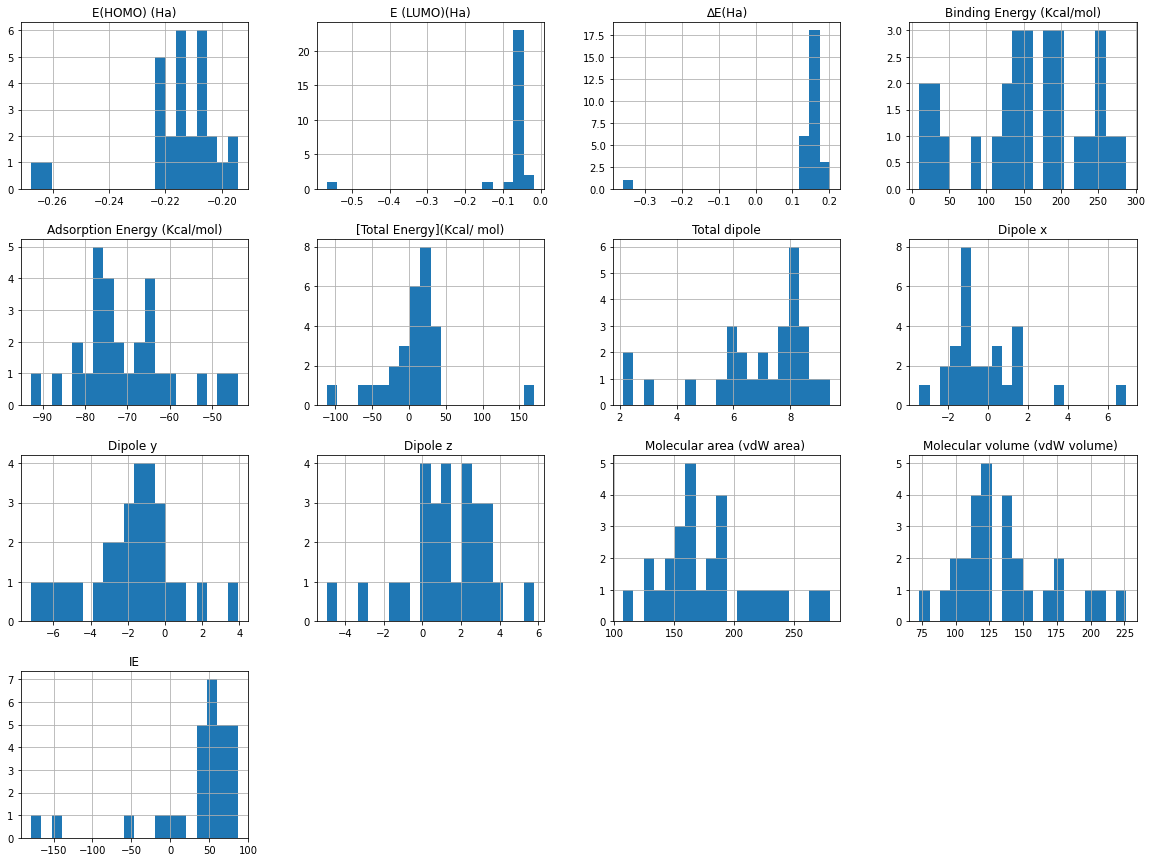

In [6]:
# Histogram sebelum ditambah sampel virtual
# =========================================
data_XY=data[['E(HOMO) (Ha)', 'E (LUMO)(Ha)', '∆E(Ha)',
       'Binding Energy (Kcal/mol)', 'Adsorption Energy (Kcal/mol)',
       '[Total Energy](Kcal/ mol)', 'Total dipole', 'Dipole x', 'Dipole y ',
       'Dipole z ', 'Molecular area (vdW area) ',
       'Molecular volume (vdW volume) ', 'IE']]
%matplotlib inline
import matplotlib.pyplot as plt
data_XY.hist(bins=20, figsize=(20,15))
plt.show()

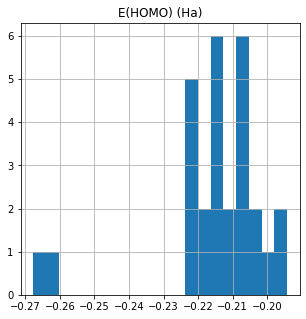

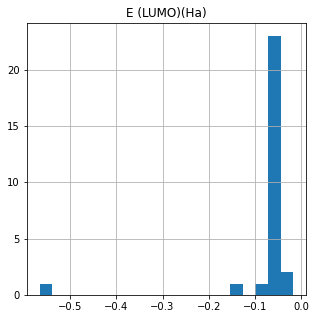

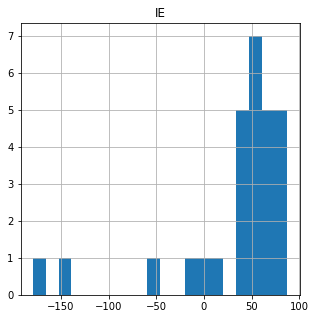

In [7]:
# Histogram sebelum ditambah sampel virtual
# =========================================

%matplotlib inline
import matplotlib.pyplot as plt

data[['E(HOMO) (Ha)']].hist(bins=20, figsize=(5,5))
data[['E (LUMO)(Ha)']].hist(bins=20, figsize=(5,5))
data[['IE']].hist(bins=20, figsize=(5,5))

plt.show()

No handles with labels found to put in legend.


Text(0.5, 1.0, 'LUMO Distribution')

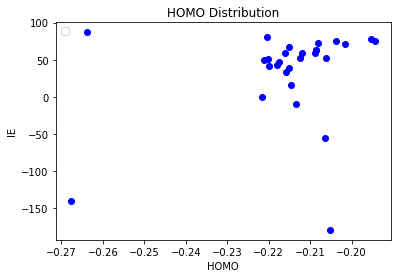

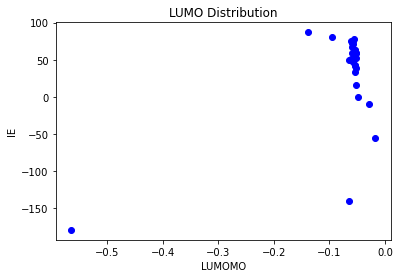

In [8]:
HOMO = data['E(HOMO) (Ha)'].values
LUMO = data['E (LUMO)(Ha)'].values
IE   = data['IE'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("HOMO")
plt.title('HOMO Distribution')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
#plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("LUMOMO")
plt.title('LUMO Distribution')


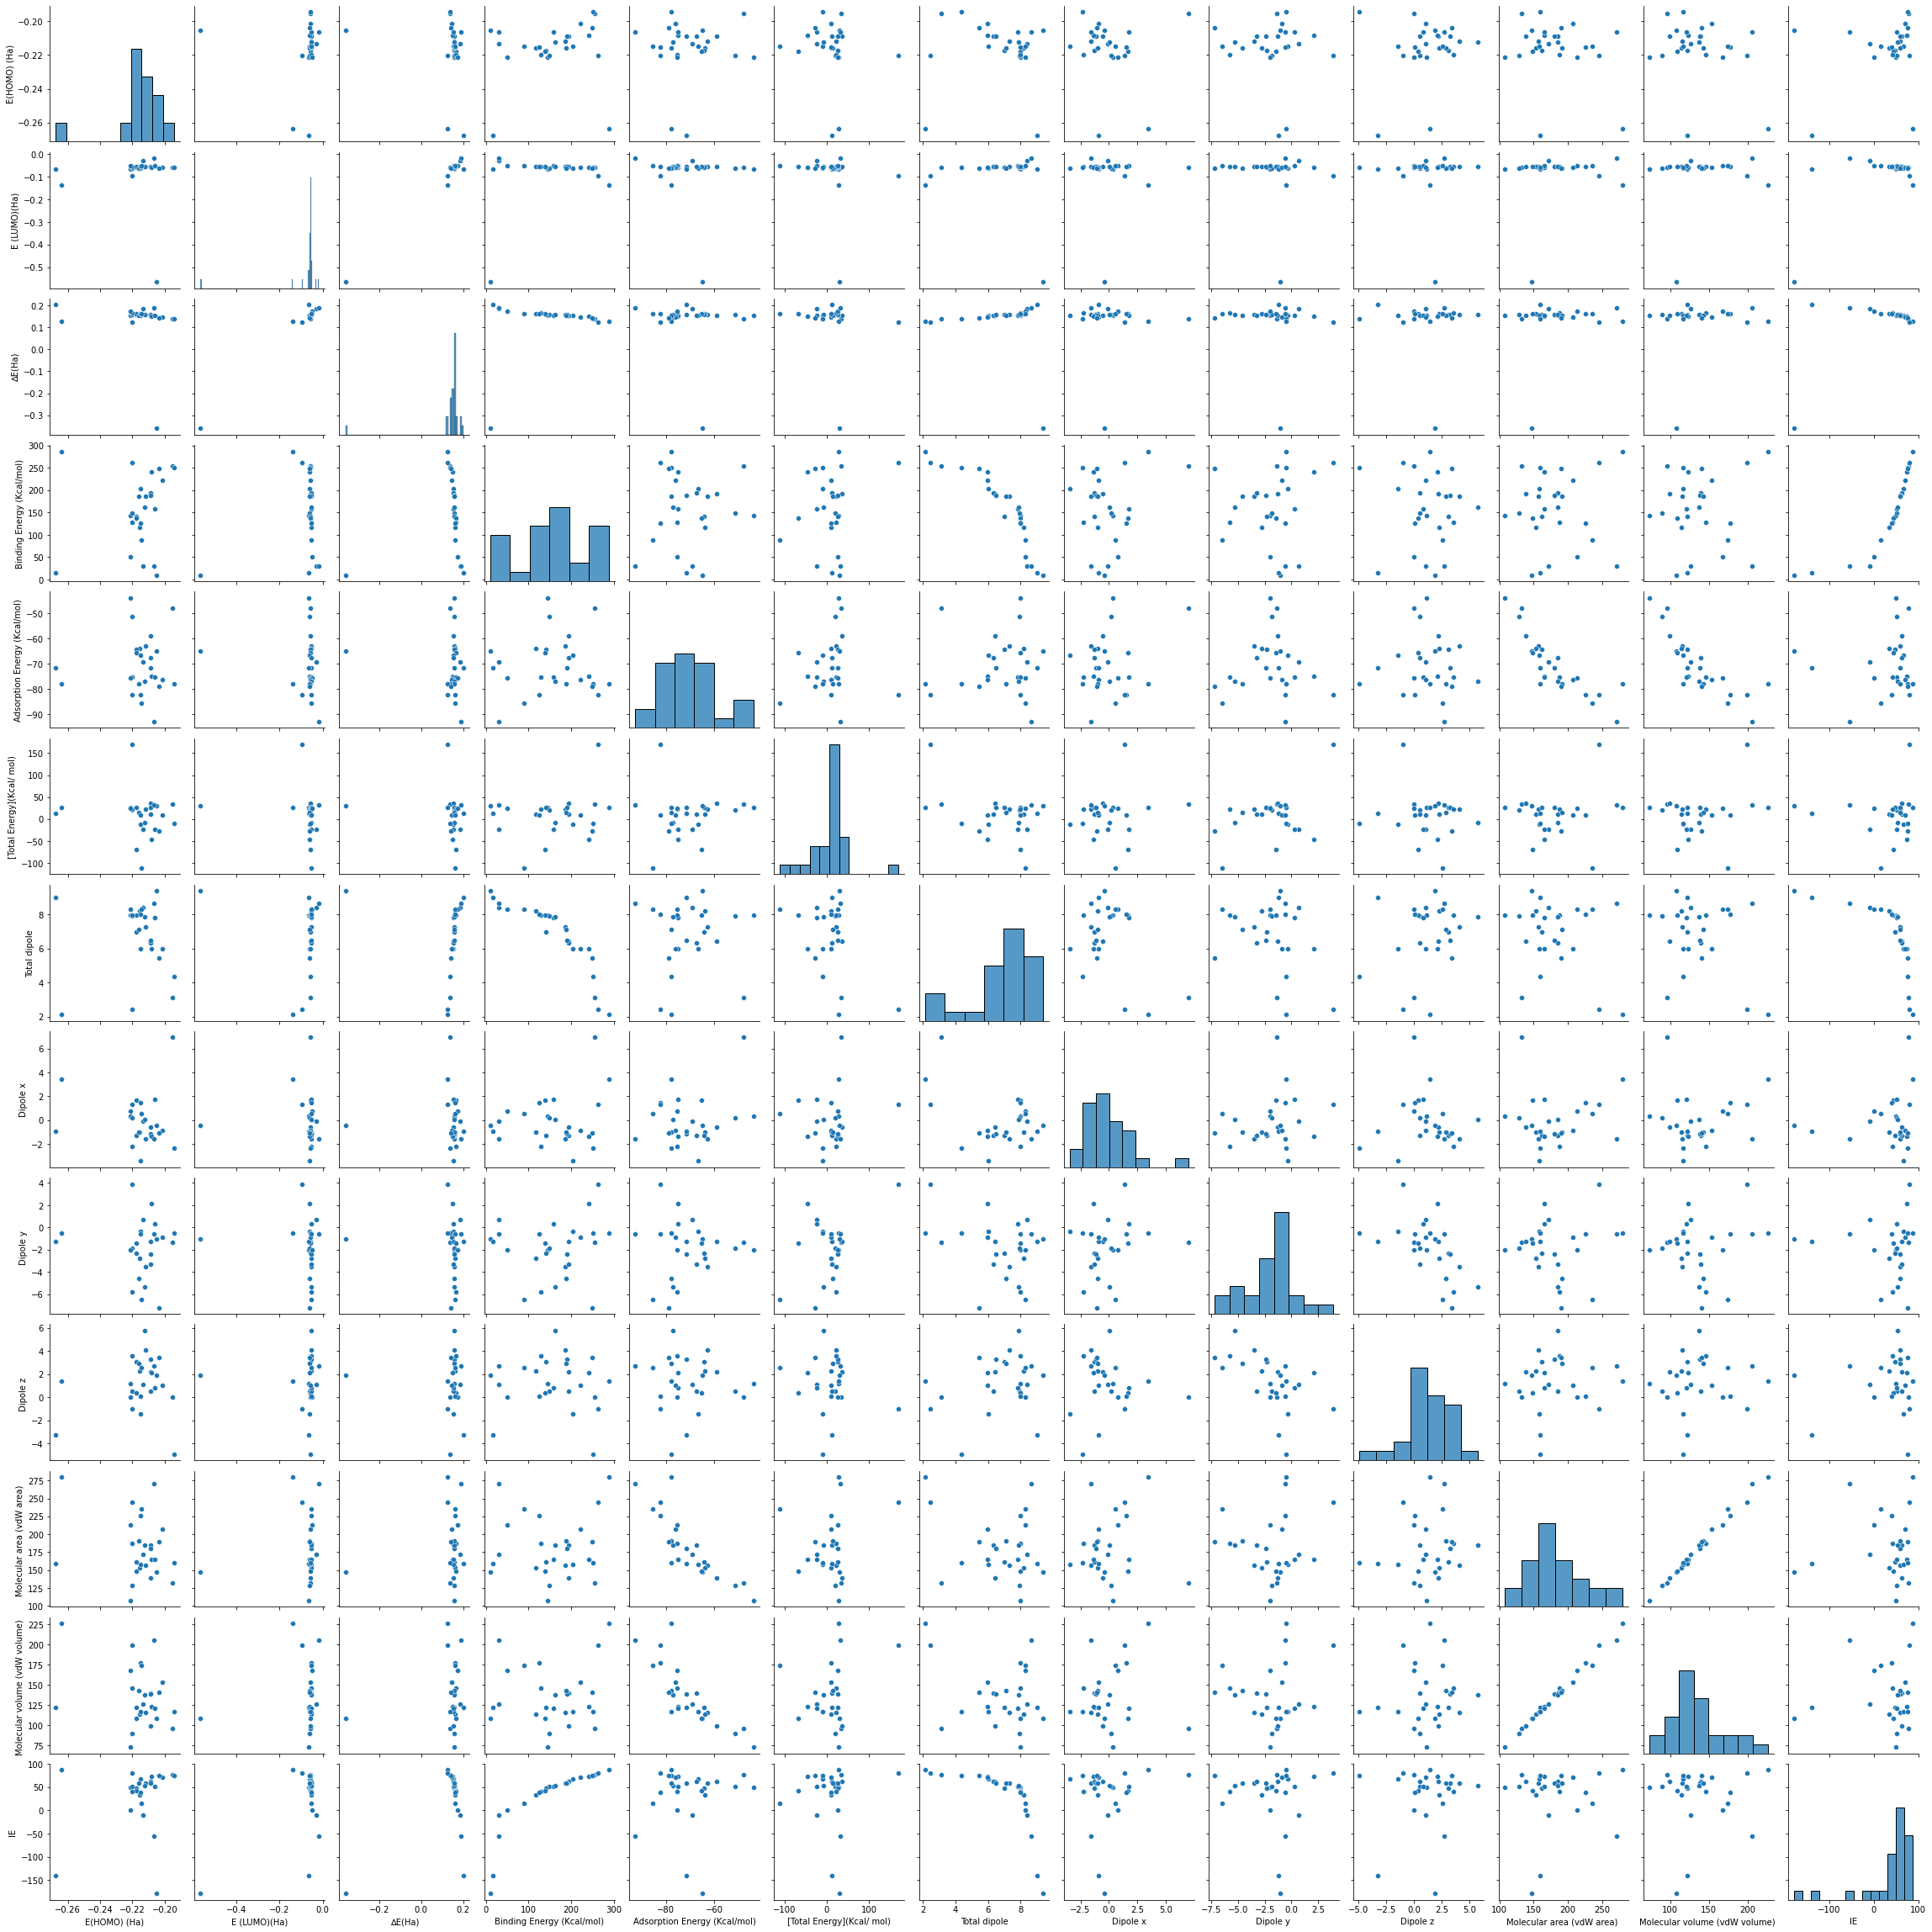

In [9]:
sns.pairplot(data_XY)

In [9]:
# Eliminate unused features:
data_X = data_XY.drop('IE', axis=1)        

#extract the labels
data_Y = data['IE'].copy()              # Rencana untuk data output (Target)


In [11]:
# Korelasi deskriptor terhadap target IE: sebelum ditambah sampel virtual
# ============================================================
from scipy.stats import spearmanr  # naik atau turun monoton (non linier)

kolom_X = ['E(HOMO) (Ha)', 'E (LUMO)(Ha)', '∆E(Ha)',
       'Binding Energy (Kcal/mol)', 'Adsorption Energy (Kcal/mol)',
       '[Total Energy](Kcal/ mol)', 'Total dipole', 'Dipole x', 'Dipole y ',
       'Dipole z ', 'Molecular area (vdW area) ',
       'Molecular volume (vdW volume) ']

for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = data_X[kolom_X[i]]
    y = data_Y
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % np.round(p,3))
    else:
        print('Samples are correlated (reject H0) p=%.3f' % np.round(p,3))
    print()

E(HOMO) (Ha) :  0.281
Samples are uncorrelated (fail to reject H0) p=0.147

E (LUMO)(Ha) :  -0.386
Samples are correlated (reject H0) p=0.042

∆E(Ha) :  -0.756
Samples are correlated (reject H0) p=0.000

Binding Energy (Kcal/mol) :  0.999
Samples are correlated (reject H0) p=0.000

Adsorption Energy (Kcal/mol) :  -0.057
Samples are uncorrelated (fail to reject H0) p=0.774

[Total Energy](Kcal/ mol) :  0.069
Samples are uncorrelated (fail to reject H0) p=0.727

Total dipole :  -0.984
Samples are correlated (reject H0) p=0.000

Dipole x :  -0.036
Samples are uncorrelated (fail to reject H0) p=0.857

Dipole y  :  0.167
Samples are uncorrelated (fail to reject H0) p=0.395

Dipole z  :  -0.113
Samples are uncorrelated (fail to reject H0) p=0.569

Molecular area (vdW area)  :  0.069
Samples are uncorrelated (fail to reject H0) p=0.726

Molecular volume (vdW volume)  :  0.036
Samples are uncorrelated (fail to reject H0) p=0.857



In [13]:
# ============================================
# Training and testing the Model  
# ============================================
Target   = data['IE'].values 
Y_ANN = data['IE ANN'].values

X = data_X.values
Y = data_Y.values

# Initialise the Scaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)  # X_normal

# K-Fold tanpa fungsi polinomial
# ==============================
from sklearn.model_selection import KFold

# data di split 30% : 70%
X_antara, X_test, y_antara, y_test = train_test_split(X, Y, test_size=8, random_state=1) 

# Leave-One -Out adalah  jumlah fold sama dengan jumlah data training
kfold = KFold(n_splits=20, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions


rmsec=[]
rmsecv=[]
rmse  =[]
r1=[]
for train_ix, test_ix in kfold.split(X_antara, y_antara):
    # select rows
    X_train, X_val = X[train_ix], X[test_ix]
    y_train, y_val = Y[train_ix], Y[test_ix]

    #=======================================
    model = KNeighborsRegressor()

    
    model.fit(X_train, y_train)
    y_pred_train  = model.predict(X_train)
    y_pred_test   = model.predict(X_test)
    y_pred_val    = model.predict(X_val)
    
    temp_rmsec    = np.sqrt(mean_squared_error(y_train, y_pred_train))
    temp_rmsecv   = np.sqrt(mean_squared_error(y_val, y_pred_val))
    temp_rmse     = np.sqrt(mean_squared_error(y_test,y_pred_test))
    temp_r1       = r2_score(y_test,y_pred_test)
    #=======================================================================================
    

    rmsec.append(temp_rmsec)
    rmsecv.append(temp_rmsecv)
    rmse.append(temp_rmse)
    r1.append(temp_r1)

#=======================================

# Training prediction
print('Training Predictions')
print('RMSECV', str(model),':',np.round(np.mean(rmsecv),3))
#print('RMSE_test :',np.round(np.mean(rmse),3))
#print('R^2       :',np.round(np.mean(r1),3))
print()
print()

# Predicting all of data
# ====================================
y_pred_KNN = model.predict(X)
r2_1     = r2_score(Y,y_pred_KNN)
r2_2     = r2_score(Y,Y_ANN)


rmse1 = np.sqrt(mean_squared_error(Y, y_pred_KNN))
rmse2 = np.sqrt(mean_squared_error(Y, Y_ANN))



# cetak hasil prediksi seluruh data
print('Prediksi seluruh Data')
print('======================')
print('RMSE KNN',str(model),' :',np.round(rmse1,3))
print('RMSE ANN           :',np.round(rmse2,3))


print()

print('R^2 ',str(model),' :',np.round(np.mean(r2_1),3))
print('R^2 ANN         :',np.round(np.mean(r2_2),3))

print()



Training Predictions
RMSECV KNeighborsRegressor() : 29.564


Prediksi seluruh Data
RMSE KNN KNeighborsRegressor()  : 45.711
RMSE ANN           : 5.157

R^2  KNeighborsRegressor()  : 0.449
R^2 ANN         : 0.993



In [12]:
# Cetak hasil prediksi seluruh data utk KNN
# =========================================
print('Prediksi:',y_pred_KNN.flatten())

Prediksi: [  24.72     71.9164   50.29     60.2596   58.46     41.54     50.4
 -131.97     45.47     66.3644   62.39    -15.23     59.73   -106.7
   69.604    54.2      45.25      3.44     68.694    51.91     67.5588
   20.3968   58.55     70.0628   41.4848   35.372    25.98    -24.11  ]


In [15]:
# ======================================================
# HCVSG (Hamiltonian Circuit Virtual Samples Generation)
# ======================================================

X = data_X.values
Y = data_Y.values

In [16]:
def Xmin_Xmax(X):
    X_min=[]
    X_max=[]
    for i in range(len(X[1,:])):   # baris ke-1, semua kolom \n",
        X_min=X_min + [np.min(X[0:, i:i+1])]  #mengambil nilai min pd setiap kolom
        X_max=X_max + [np.max(X[0:, i:i+1])]  #mengambil nilai max pd setiap kolom
    
    X_min=np.array(X_min)
    X_max=np.array(X_max)
    return X_min, X_max
    
def Gabung_X_Xmin_Xmax(X, X_min, X_max):
    X = np.vstack((X,X_min))
    X = np.vstack((X,X_max))
    return X
    
def Normalisasi(X):
    scaler = MinMaxScaler()
    normal = scaler.fit_transform(X)
    return normal
    
def Split_X_Xmin_Xmax(X):
    X=X[0:-2,:]
    return X
    
def preprosesing(X, X_min, X_max):
    Gabung = Gabung_X_Xmin_Xmax(X, X_min, X_max)
    Normal = Normalisasi(Gabung)
    Split_normal = Split_X_Xmin_Xmax(Normal)
    return Split_normal

def Denormalisasi(X_normal,X_min, X_max):
    X = np.vstack((X_min, X_max))
    scaler = MinMaxScaler()
    scaler.fit_transform(X)
    X_inv = scaler.inverse_transform(X_normal)
    return X_inv


X_min, X_max = Xmin_Xmax(X)

In [17]:
regressor_Non_VSG = KNeighborsRegressor(1)
regressor_VSG = KNeighborsRegressor(1)

In [30]:
# ==========================  Searching of HCVSG ==========================


J_sampel = [20]       
Batas    = 2  # Theta
Seed_angka = 1 + np.arange(1000)

for Jumlah_sampel in J_sampel:
    
    
    # ================================= Pengambilan sampel Training ====================================================\n",
    for Random_Data_Split in Seed_angka:
        
        # 1 Dtrain > 9 jalur
        Rand_D_Split  = []
        Rand_VSGP     = []
        Kinerja1 = []
        Kinerja2 = []
        Counter  = 0
        
        Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)
        x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split)
        
        x_tr   = preprosesing(x_t, X_min, X_max)
        x_test = preprosesing(x_uji, X_min, X_max)
        y_tr   = y_t.reshape(-1,1)
        y_test = y_uji.reshape(-1,1)
        
        # ==========  Predict Non VSG ===================================\n",
        regressor_Non_VSG.fit(x_tr, y_tr) #training the algorithm\n",
        y_pred_Non_VSG = regressor_Non_VSG.predict(x_test)
        # =======================================================\n",
        
        
        No_bil_acak = 1+ np.arange(500) 
        # =================================  Pengacakan posisi Array ==========================\n",
        for Random_VSGP in No_bil_acak:
            
            x_latih, y_latih = shuffle(x_tr, y_tr, random_state= Random_VSGP)   # Posisi Array diacak\n",          
            y_latih  = y_latih.reshape(-1,1)
            #agar posisi terakhir terhubung dg posisi awal\n",
            x_latih = np.vstack(([x_latih,x_latih[0]]))         
            y_latih = np.vstack(([y_latih,y_latih[0]]))
            
            Juml_fitur=len(X[0])      
            X1= np.zeros(Juml_fitur);     
            Y1=[0];  
            

            # ==================== Awal VSG      ===================================\n",


            SISIPAN = 10  
            
            for i in range (len(x_latih)-1):
                
                for j in range(SISIPAN):             
                    t=(j)/(SISIPAN)

                    temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
                    temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])
                    #=======================================================================\n",

                    X1=np.vstack((X1,temp_x))  
                    Y1=np.vstack((Y1,temp_y)) 

                # ===============================================================\n",
            #===for i in range (len(x_latih)==============================\n",
            
            
            X1=X1[1:] #menghilangkan inisialisasi X[0]
            Y1=Y1[1:] #menghilangkan inisialisasi Y[0]
        
            # ============== Predict VSG =========================\n",

            regressor_VSG.fit(X1, Y1) #training the algorithm\n",
            y_pred_VSG = regressor_VSG.predict(x_test)
            # ====================================================\n",
            

            # ========================   RMSE ================================================================   \n",
            temp1 = np.sqrt(mean_squared_error(y_test,y_pred_Non_VSG))*100/(np.max(Y)-np.min(Y))   # RMSE\n",
            temp2 = np.sqrt(mean_squared_error(y_test,y_pred_VSG))*100/(np.max(Y)-np.min(Y))       # RMSE\n",
            # =================================================================================================\n",
            

            if (temp2 < temp1) and (temp2 < Batas):  
                Counter = Counter + 1
                Rand_D_Split.append(Random_Data_Split)
                Rand_VSGP.append(Random_VSGP)
                Kinerja1.append(np.round(temp1,3) )
                Kinerja2.append(np.round(temp2,3) )
                print('HCVSG: ',Counter)
                print('Random_Data_Split: ',Random_Data_Split)
                print('Random_HCVSG: ',Random_VSGP)
                print('RMSE of KNN: ',np.round(np.mean(temp1),3))
                print('RMSE of KNN + VSG : ',np.round(np.mean(temp2),3))
                print()
                print()
            if Counter > 9: break  # 1 Dtrain ada 10 jalur
  
                
            #=======================================
        # ======================= FOR Random VSGP =========================================    
        if Counter > 9: break
        
    # ========================== FOR Random Split =========================================

# ========================================================================================\n",
print('Method: ', str(regressor_Non_VSG))
print('============================================')
print('number of training samples = ',J_sampel[0])
print('Threshold Theta            = ',Batas)
print('Random_Data_Split          = ',Rand_D_Split)
print('Random_HCVSG               = ',Rand_VSGP)
print('RMSE of KNN                = ',np.round(np.mean(Kinerja1),3))
print('RMSE of KNN+VSG            = ',np.round(np.mean(Kinerja2),3))
print()



HCVSG:  1
Random_Data_Split:  1
Random_HCVSG:  478
RMSE of KNN:  3.017
RMSE of KNN + VSG :  1.841


HCVSG:  1
Random_Data_Split:  47
Random_HCVSG:  351
RMSE of KNN:  7.453
RMSE of KNN + VSG :  1.95


HCVSG:  1
Random_Data_Split:  55
Random_HCVSG:  99
RMSE of KNN:  6.05
RMSE of KNN + VSG :  1.187


HCVSG:  2
Random_Data_Split:  55
Random_HCVSG:  125
RMSE of KNN:  6.05
RMSE of KNN + VSG :  1.893


HCVSG:  3
Random_Data_Split:  55
Random_HCVSG:  419
RMSE of KNN:  6.05
RMSE of KNN + VSG :  1.943


HCVSG:  1
Random_Data_Split:  72
Random_HCVSG:  268
RMSE of KNN:  7.372
RMSE of KNN + VSG :  1.969


HCVSG:  2
Random_Data_Split:  72
Random_HCVSG:  456
RMSE of KNN:  7.372
RMSE of KNN + VSG :  1.996


HCVSG:  1
Random_Data_Split:  85
Random_HCVSG:  165
RMSE of KNN:  2.912
RMSE of KNN + VSG :  1.941


HCVSG:  2
Random_Data_Split:  85
Random_HCVSG:  193
RMSE of KNN:  2.912
RMSE of KNN + VSG :  1.824


HCVSG:  1
Random_Data_Split:  93
Random_HCVSG:  122
RMSE of KNN:  7.092
RMSE of KNN + VSG :  1.67

In [ ]:
'''
Method:  KNeighborsRegressor(n_neighbors=1)
============================================
number of training samples =  20
Threshold Theta            =  2
Random_Data_Split          =  [124, 124, 124, 124, 124, 124, 124, 124, 124, 124]
Random_HCVSG               =  [16, 29, 46, 47, 56, 65, 72, 73, 75, 84]
RMSE of KNN                =  3.691
RMSE of KNN+VSG            =  1.551

'''


### A pair of Random_Data_Split and Random_HCVSG is called HCVSG, used for generate virtual samples

In [31]:
# Training 
# ==========================

X = data_X.values
Y = data_Y.values

X_normal = preprosesing(X, X_min, X_max)


Juml_fitur=len(X[0])      
X1= np.zeros(Juml_fitur);     
Y1=[0];  
rmse=[] #untuk pelatihan
R2  =[] #untuk pelatihan

Random_Data_Split          =  [124, 124, 124, 124, 124, 124, 124, 124, 124, 124]
Random_HCVSG               =  [16, 29, 46, 47, 56, 65, 72, 73, 75, 84]
Jumlah_sampel = 20
Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)

for k in range(len(Random_HCVSG)):
    x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split[k]) #versi lama
    
 
    x_tr   = preprosesing(x_t, X_min, X_max)
    x_test = preprosesing(x_uji, X_min, X_max)
    y_tr=y_t.reshape(-1,1)
    y_test=y_uji.reshape(-1,1)


# =================================  Pengacakan posisi Array ==========================

                           
    x_, y_ = shuffle(x_tr, y_tr, random_state= Random_HCVSG[k])   # Posisi Array diacak
         
    y_latih  = y_.reshape(-1,1)
    x_latih  = x_
    #agar posisi terakhir terhubung dg posisi awal
    x_latih = np.vstack(([x_latih,x_latih[0]]))         
    y_latih = np.vstack(([y_latih,y_latih[0]]))
    
    
    # ==================== Awal VSG      ===================================
    XA= np.zeros(Juml_fitur);   #untuk pelatihan  
    YA=[0];                     #untuk pelatihan
    
    SISIPAN = 10
    for i in range (len(x_latih)-1):

        for j in range(SISIPAN):             
            t=(j+1)/(SISIPAN+1)                      
            temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
            temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])           
            #=======================================================================
                        
            X1=np.vstack((X1,temp_x))  #simpan seluruh vs
            Y1=np.vstack((Y1,temp_y))  #simpan seluruh vs
            
            XA=np.vstack((XA,temp_x))  #simpan untuk pelatihan
            YA=np.vstack((YA,temp_y))  #simpan untuk pelatihan

        # ===============================================================
    # ===================================================================
    
    
    #=== Untuk Data Pelatihan =================
    XA=XA[1:] #menghilangkan inisialisasi X[0]
    YA=YA[1:] #menghilangkan inisialisasi Y[0]
    XA1=np.vstack((XA,x_tr))  # sampel virtual digabung dengan data training
    YA1=np.vstack((YA,y_tr))  # sampel virtual digabung dengan data training
    
    model = KNeighborsRegressor(1)
 
    
    model.fit(XA1,YA1)
    y_pred=model.predict(x_test)
    temp1 = np.sqrt(mean_squared_error(y_test,y_pred))
    temp2 = r2_score(y_test,y_pred)
    rmse.append(temp1)
    R2.append(temp2)
    #============================================================

X1=X1[1:] #menghilangkan inisialisasi X[0]
Y1=Y1[1:] #menghilangkan inisialisasi Y[0]

X1=np.vstack((X1,x_tr))  # sampel virtual digabung dengan data training
Y1=np.vstack((Y1,y_tr))  # sampel virtual digabung dengan data training

rmse_cv = np.round(np.mean(rmse),3)  
R2_cv   = np.round(np.max(R2),3)
print('RMSE_CV KNN+VSG:',rmse_cv)
#print('R-Squared     :',R2_cv)

RMSE_CV KNN+VSG: 4.469


### Model testing

In [32]:

model = KNeighborsRegressor()

model.fit(X1, Y1)
# ==================================================

# hasil prediksi model ANN dari paper
Y_2 = data['IE ANN'] 
X = data_X.values
Y = data_Y.values
X_min, X_max = Xmin_Xmax(X)
X_normal   = preprosesing(X, X_min, X_max)

# %RMSE 
# ====================================================================================================
x_train, x_test, y_train, y_test = train_test_split(X_normal, Y, test_size=3, random_state=1)
y_pred_VSG_train = model.predict(x_train)
y_pred_VSG_test  = model.predict(x_test)
RMSE_test        = np.sqrt(mean_squared_error(y_test,y_pred_VSG_test))       # RMSE\n",
r2_test          = r2_score(y_test,y_pred_VSG_test)

# %RMSE seluruh Data
# ====================================================================================================
X_normal    = preprosesing(X, X_min, X_max)
y_pred_VSG  = np.round(model.predict(X_normal).flatten(),2)


r2_1     = r2_score(Y,y_pred_VSG)
r2_2     = r2_score(Y,Y_2)

rmse1 = np.sqrt(mean_squared_error(Y,y_pred_VSG))
rmse2 = np.sqrt(mean_squared_error(Y,Y_2))

#print('============= Prediksi VSG ALL Data =============')
print('RMSE', str(model), '+VSG: ',np.round(rmse1,3))
print('R^2 ', str(model),' +VSG :', np.round(r2_1,3))
print()
print('RMSE ANN    : ',np.round(rmse2,3))
print('R^2 ANN     :', np.round(r2_2,3))
print()



RMSE KNeighborsRegressor() +VSG:  4.626
R^2  KNeighborsRegressor()  +VSG : 0.994

RMSE ANN    :  5.157
R^2 ANN     : 0.993



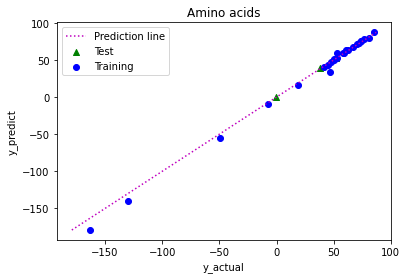

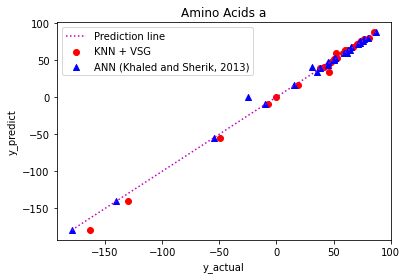

In [33]:
xline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))
yline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))

plt.figure()
plt.scatter(y_pred_VSG_test,y_test,    c='g', marker = '^', label = "Test")
plt.scatter(y_pred_VSG_train,y_train , c='b', label = "Training")
plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='upper left')
plt.xlabel("y_actual")
plt.ylabel("y_predict") 
plt.title('Amino acids')
plt.show()

# Buat grafik VSG dan VSG utk seluruh data
plt.figure()
plt.scatter(y_pred_VSG,Y,    c='r', label = 'KNN + VSG')
plt.scatter(Y_2,Y,   c='b',  marker = '^',    label = 'ANN (Khaled and Sherik, 2013)')
plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='upper left')
plt.xlabel("y_actual")
plt.ylabel("y_predict") 
plt.title('Amino Acids a')
plt.show()





### Histogram after adding virtual samples

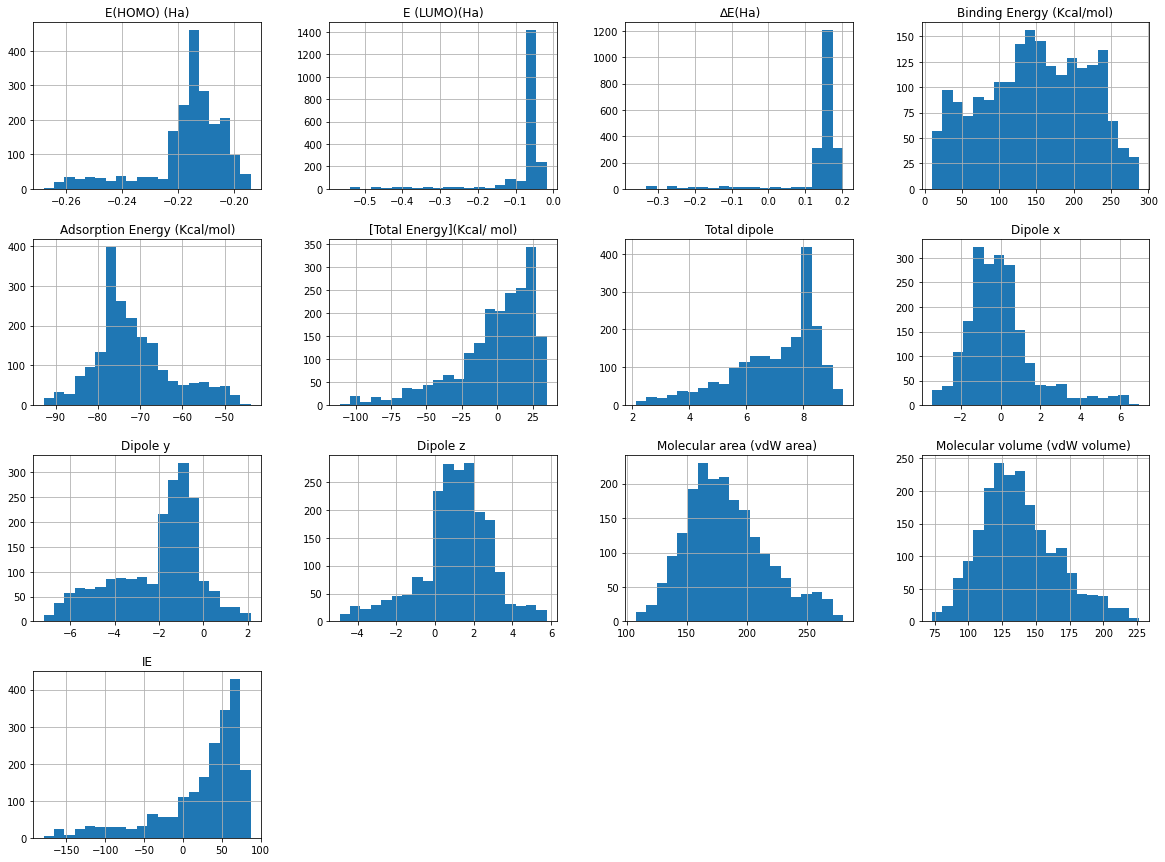

In [35]:
import pandas as pd
kolom_XY = ['E(HOMO) (Ha)', 'E (LUMO)(Ha)', '∆E(Ha)',
       'Binding Energy (Kcal/mol)', 'Adsorption Energy (Kcal/mol)',
       '[Total Energy](Kcal/ mol)', 'Total dipole', 'Dipole x', 'Dipole y ',
       'Dipole z ', 'Molecular area (vdW area) ',
       'Molecular volume (vdW volume) ', 'IE']


# utk kebutuhan grafik, X1 hrs di invers supaya besarannya kembali seperti semula
X_inv=Denormalisasi(X1,X_min, X_max)
X_inv = np.round_(X_inv, decimals = 3)
Y_inv=np.round_(Y1, decimals = 3)
Data_VSG = np.hstack((X_inv,Y_inv))
Data_VSG_XY = pd.DataFrame(Data_VSG, columns=kolom_XY)
Data_VSG_XY.hist(bins=20, figsize=(20,15))
plt.show()

In [36]:
# Correlation between descriptors and targets (IE)
from scipy.stats import spearmanr  

for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = Data_VSG_XY[kolom_X[i]]
    y = Y1
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
        print()
    else:        
        print('Samples are correlated (reject H0) p=%.3f' % p)
        print()


E(HOMO) (Ha) :  0.184
Samples are correlated (reject H0) p=0.000

E (LUMO)(Ha) :  -0.204
Samples are correlated (reject H0) p=0.000

∆E(Ha) :  -0.508
Samples are correlated (reject H0) p=0.000

Binding Energy (Kcal/mol) :  0.955
Samples are correlated (reject H0) p=0.000

Adsorption Energy (Kcal/mol) :  0.008
Samples are uncorrelated (fail to reject H0) p=0.713

[Total Energy](Kcal/ mol) :  -0.226
Samples are correlated (reject H0) p=0.000

Total dipole :  -0.871
Samples are correlated (reject H0) p=0.000

Dipole x :  0.061
Samples are correlated (reject H0) p=0.006

Dipole y  :  0.075
Samples are correlated (reject H0) p=0.001

Dipole z  :  0.028
Samples are uncorrelated (fail to reject H0) p=0.203

Molecular area (vdW area)  :  0.012
Samples are uncorrelated (fail to reject H0) p=0.579

Molecular volume (vdW volume)  :  -0.009
Samples are uncorrelated (fail to reject H0) p=0.686



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Molecular volume Distribution')

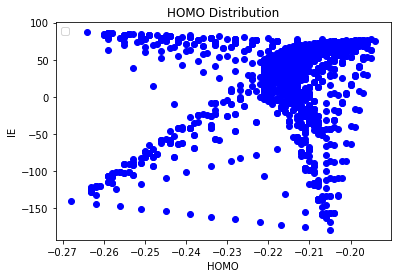

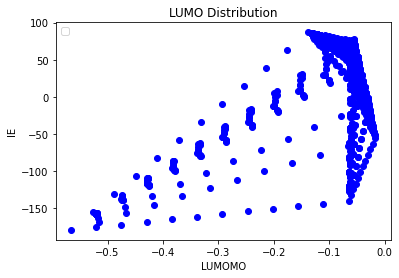

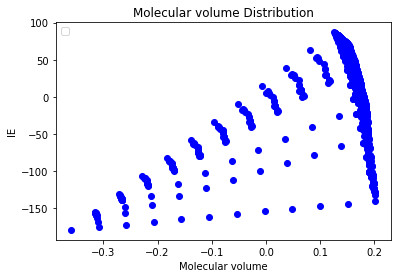

In [38]:
HOMO = Data_VSG_XY['E(HOMO) (Ha)'].values
LUMO = Data_VSG_XY['E (LUMO)(Ha)'].values
Molec= Data_VSG_XY['∆E(Ha)'].values
IE   = Data_VSG_XY['IE'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("HOMO")
plt.title('HOMO Distribution')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("LUMOMO")
plt.title('LUMO Distribution')


plt.figure()
plt.scatter(Molec,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("Molecular volume")
plt.title('Molecular volume Distribution')

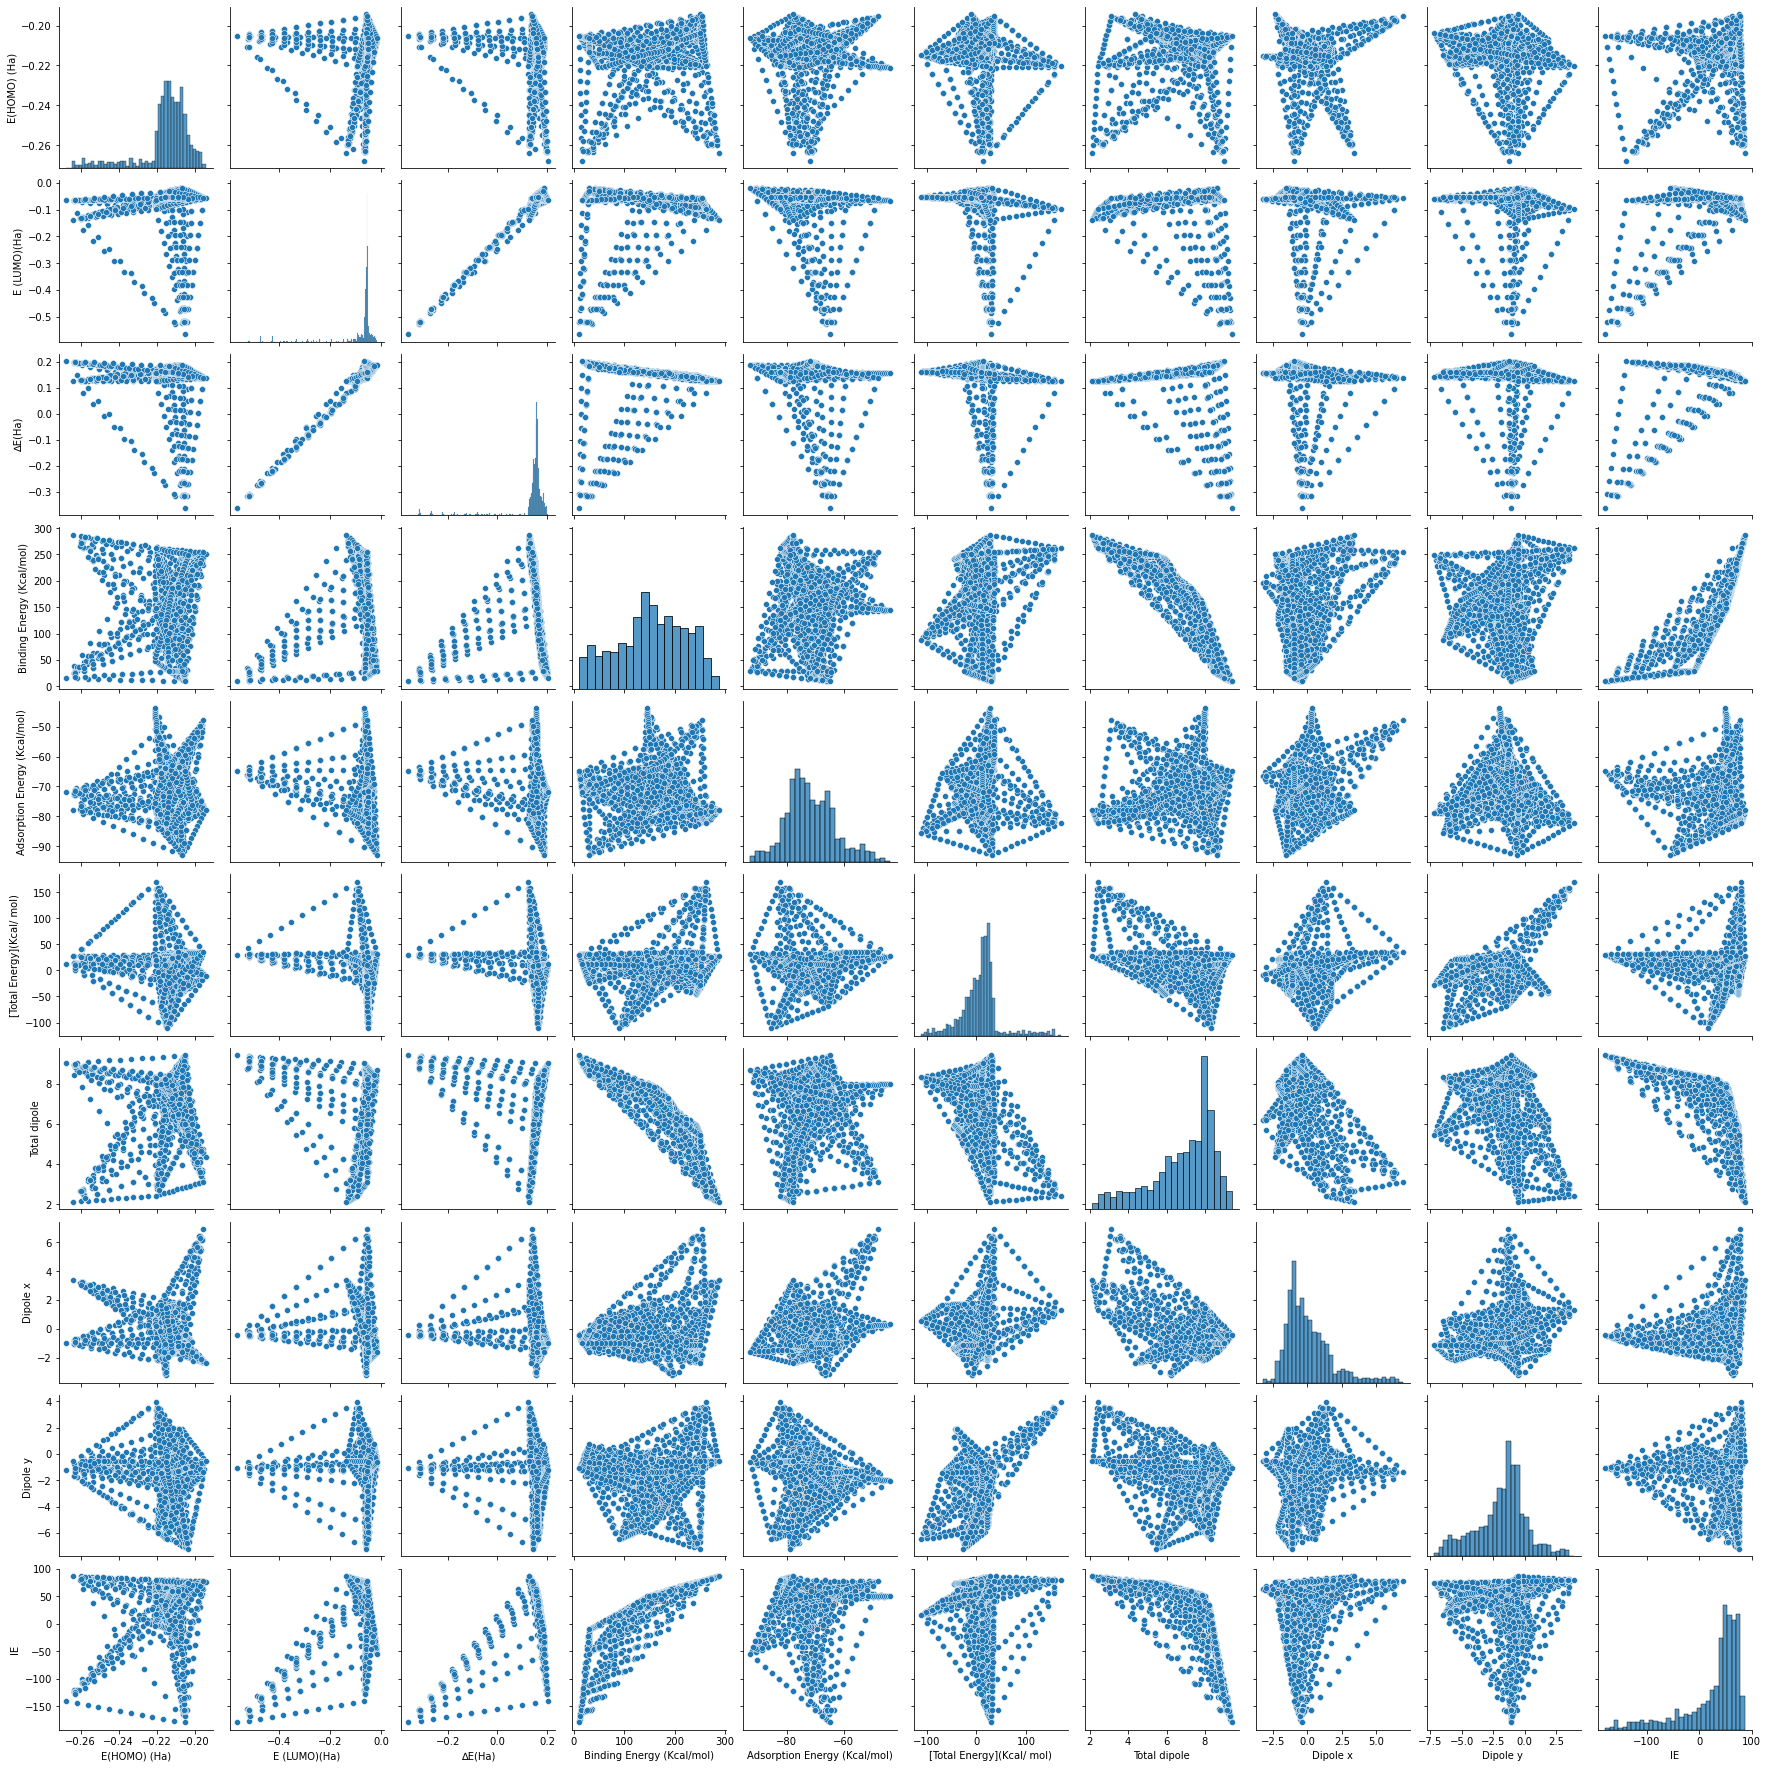

In [24]:
sns.pairplot(Data_VSG_XY)